## **Linear Regression from scratch (NumPy)** ##

### **Project Objective :** ###

The goal of this project is to implement linear regression from scratch using gradient descent on a synthetic dataset. The purpose is to build a solid understanding of the linear algebra and matrix operations that underpin high-level machine learning libraries such as scikit-learn.

This implementation includes key elements such as loss calculation (MSE, R²), parameter updates with gradient descent, and basic early stopping criteria.

A deliberately small dataset is used to make the project more pedagogical and to clearly illustrate each computational step. This project is intended both as a learning exercise and as a foundation for extending towards more advanced models (e.g., logistic regression, softmax regression).

Avant de réaliser une regression certain postulat statistiques essentielles sont à vérifier

### **Assumptions of linear regression**  ###

- Linearity  
- Independence of errors  
- Homoscedasticity (constant variance of errors)  
- Normality of errors (for inference)  
- No multicollinearity  

These are the classical assumptions behind linear regression. If you’re interested, I invite you to explore them in more detail, as they are key to understanding when the model is reliable.


### **Exploratory Data Analysis (EDA)**

Before training any machine learning model, it is essential to perform an **exploratory data analysis (EDA)**.  
This usually includes:
- Looking at the distribution of the target variable  
- Checking correlations or covariance between features  
- Detecting multicollinearity  
- Identifying missing values  
- Visualizing relationships (scatter plots, box plots, histograms, etc.)  

=> This step helps to understand the dataset, validate assumptions, and guide preprocessing choices.  

=> In this notebook, since the data is **synthetic** and to keep things digestible, we skip the EDA.  
But in a real project, **EDA is a crucial step** before building any predictive model.

### **1. Import Libraries & Set Paths** ###

In [630]:
import pandas as pd
import numpy as np
from pathlib import Path

In [631]:
# Root directory = the notebook’s directory
ROOT = Path().resolve()
DATA_PATH = ROOT / "data" / "dataset_rent.csv"
IMG_PATH = ROOT / "image" / "Gradient_descent_image.webp"

print(DATA_PATH)
print(IMG_PATH)

assert DATA_PATH.exists(), "DATA_PATH not found : {DATA_PATH}"
assert IMG_PATH.exists(), f"Image not found: {IMG_PATH}"

C:\Users\33760\Desktop\entretiens_techniques\data\dataset_rent.csv
C:\Users\33760\Desktop\entretiens_techniques\image\Gradient_descent_image.webp


### **2. Load the Dataset** ###

In [632]:
# Import CSV
df = pd.read_csv(DATA_PATH)

In [633]:
# Display dataset
df.head()

,surface,furnished,distance_metro_km,district,rent
0,20,0,0.2,center,984
1,35,1,0.1,suburb,1792
2,50,0,0.8,suburb,1986
3,45,1,0.5,periphery,2210
4,28,0,0.3,center,1216


Columns of X:

- surface (m²) → numerical

- furnished (0/1) → already numerical (no encoding required)

- distance_metro (km) → numerical

- district = ["center", "suburb", "outskirts"]

Column of y :

- rent → target

**Objective: predict the rent price.**

In [634]:
# Shape dataset
rows, cols = df.shape

print(f"The dataset contains {rows} rows and {cols} columns.")

The dataset contains 30 rows and 5 columns.


### **3. Preprocessing Before Training** ###

##### 3.1 Convert DataFrame to NumPy Array #####

Using NumPy allows us to perform the linear algebra calculations that are required for machine learning models.

In [635]:
# Convert dataframe to numpy array
data_arr = df.values

print(f"Data struture : {type(data_arr)}")

Data struture : <class 'numpy.ndarray'>


In [636]:
# Display array
data_arr

array([[20, 0, 0.2, 'center', 984],
       [35, 1, 0.1, 'suburb', 1792],
       [50, 0, 0.8, 'suburb', 1986],
       [45, 1, 0.5, 'periphery', 2210],
       [28, 0, 0.3, 'center', 1216],
       [60, 1, 1.0, 'suburb', 2470],
       [42, 0, 0.2, 'periphery', 1944],
       [55, 1, 0.4, 'center', 2218],
       [33, 0, 1.5, 'suburb', 1420],
       [70, 1, 0.0, 'periphery', 3000],
       [25, 0, 0.1, 'center', 1100],
       [40, 1, 0.6, 'suburb', 1870],
       [65, 0, 0.9, 'suburb', 2320],
       [48, 1, 0.3, 'center', 2100],
       [30, 0, 0.7, 'periphery', 1380],
       [52, 1, 0.4, 'suburb', 2250],
       [38, 0, 0.2, 'center', 1650],
       [75, 1, 1.2, 'suburb', 3150],
       [28, 1, 0.5, 'periphery', 1500],
       [46, 0, 0.8, 'suburb', 1800],
       [58, 1, 0.0, 'center', 2600],
       [22, 0, 1.0, 'suburb', 1050],
       [62, 1, 0.7, 'periphery', 2400],
       [36, 0, 0.4, 'center', 1580],
       [49, 1, 0.9, 'suburb', 2050],
       [55, 0, 1.5, 'periphery', 1900],
       [68, 1, 0.3

##### 3.2 Separating explanatory variables (features) and the dependent variable (target) #####

In [637]:
def Separate_X_y(data_arr):    
    # Separate X, y
    X = data_arr[:, :-1]
    y = data_arr[:, -1]

    # Dimension matrix X 
    n_samples = X.shape

    # Check
    print(f"X : {X}")
    print(f"shape X - rows : {n_samples[0]}, columns : {n_samples[1]}")

    print(f"\n y : {y}")
    print(f"shape y - rows : {y.shape[0]}")
    
    return X, y

In [638]:
# Instanciate function
X, y = Separate_X_y(data_arr)

X : [[20 0 0.2 'center']
 [35 1 0.1 'suburb']
 [50 0 0.8 'suburb']
 [45 1 0.5 'periphery']
 [28 0 0.3 'center']
 [60 1 1.0 'suburb']
 [42 0 0.2 'periphery']
 [55 1 0.4 'center']
 [33 0 1.5 'suburb']
 [70 1 0.0 'periphery']
 [25 0 0.1 'center']
 [40 1 0.6 'suburb']
 [65 0 0.9 'suburb']
 [48 1 0.3 'center']
 [30 0 0.7 'periphery']
 [52 1 0.4 'suburb']
 [38 0 0.2 'center']
 [75 1 1.2 'suburb']
 [28 1 0.5 'periphery']
 [46 0 0.8 'suburb']
 [58 1 0.0 'center']
 [22 0 1.0 'suburb']
 [62 1 0.7 'periphery']
 [36 0 0.4 'center']
 [49 1 0.9 'suburb']
 [55 0 1.5 'periphery']
 [68 1 0.3 'center']
 [32 0 0.6 'suburb']
 [44 1 0.5 'periphery']
 [80 1 1.0 'suburb']]
shape X - rows : 30, columns : 4

 y : [984 1792 1986 2210 1216 2470 1944 2218 1420 3000 1100 1870 2320 2100 1380
 2250 1650 3150 1500 1800 2600 1050 2400 1580 2050 1900 2850 1520 2000
 3400]
shape y - rows : 30


##### 3.3 Encode Categorical Variables #####

To perform one-hot encoding of the categorical variable, each class is first mapped to a unique integer (0, 1, 2). Then, an identity matrix of size equal to the number of classes is generated. For each observation, the corresponding row of the identity matrix is selected to build the final one-hot encoded matrix of shape (30, 3), where each row contains a single 1 indicating the class of the observation.

In [639]:
# Create mapping
mapping = {"center": 0, "periphery": 1, "suburb" : 2}


def mapping_district(X, mapping):
    # Apply mapping on "district" column
    X[:, 3] = np.array([mapping[val] for val in X[:, 3]], dtype = int)
    
    print(f"X : {X}")
    print(f"data type district columns : {X[:, 3].dtype}")
    
    return X

In [640]:
# Instanciate function
X = mapping_district(X,mapping)

X : [[20 0 0.2 0]
 [35 1 0.1 2]
 [50 0 0.8 2]
 [45 1 0.5 1]
 [28 0 0.3 0]
 [60 1 1.0 2]
 [42 0 0.2 1]
 [55 1 0.4 0]
 [33 0 1.5 2]
 [70 1 0.0 1]
 [25 0 0.1 0]
 [40 1 0.6 2]
 [65 0 0.9 2]
 [48 1 0.3 0]
 [30 0 0.7 1]
 [52 1 0.4 2]
 [38 0 0.2 0]
 [75 1 1.2 2]
 [28 1 0.5 1]
 [46 0 0.8 2]
 [58 1 0.0 0]
 [22 0 1.0 2]
 [62 1 0.7 1]
 [36 0 0.4 0]
 [49 1 0.9 2]
 [55 0 1.5 1]
 [68 1 0.3 0]
 [32 0 0.6 2]
 [44 1 0.5 1]
 [80 1 1.0 2]]
data type district columns : object


In [641]:
# Separate numerical and categorical variable to ease preprocessing
X_num = X[:, :-1]
X_cat = X[:, -1]

In [642]:
# Convert to int since these values will be used as indices 
# to select the corresponding row from the identity matrix
X_cat = X_cat.astype(int)

In [643]:
X_cat

array([0, 2, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 2, 0, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 0, 2, 1, 0, 2, 1, 2])

In [644]:
X_num

array([[20, 0, 0.2],
       [35, 1, 0.1],
       [50, 0, 0.8],
       [45, 1, 0.5],
       [28, 0, 0.3],
       [60, 1, 1.0],
       [42, 0, 0.2],
       [55, 1, 0.4],
       [33, 0, 1.5],
       [70, 1, 0.0],
       [25, 0, 0.1],
       [40, 1, 0.6],
       [65, 0, 0.9],
       [48, 1, 0.3],
       [30, 0, 0.7],
       [52, 1, 0.4],
       [38, 0, 0.2],
       [75, 1, 1.2],
       [28, 1, 0.5],
       [46, 0, 0.8],
       [58, 1, 0.0],
       [22, 0, 1.0],
       [62, 1, 0.7],
       [36, 0, 0.4],
       [49, 1, 0.9],
       [55, 0, 1.5],
       [68, 1, 0.3],
       [32, 0, 0.6],
       [44, 1, 0.5],
       [80, 1, 1.0]], dtype=object)

In [645]:
def encode_cat(X_cat):
    """
    One-hot encode a categorical variable using an identity matrix.

    Steps:
    - Determine the number of classes from X_cat (here 3: 0, 1, 2).
    - Create an identity matrix of size (n_classes, n_classes).
    - Use the values in X_cat as indices to select the corresponding
      rows from the identity matrix, producing the one-hot matrix.
    - Drop the last column to avoid perfect multicollinearity 
      (dummy variable trap).
    """

    n_classes = int(X_cat.max() + 1) # here 3 classes (0,1,2)

    # Create an identity matrix of size n_classes and index it with X_cat
    local_onehot = np.eye(n_classes)[X_cat]

    # Drop the last column to avoid multicollinearity
    local_onehot_reduced = local_onehot[:, :-1]

    print(f"Identity Matrx : \n{np.eye(n_classes)}")
    print("\n")
    print(f"District column onehot : \n{local_onehot_reduced}")
    
    return local_onehot_reduced

In [646]:
# Instanciate function
local_onehot_reduced = encode_cat(X_cat)

Identity Matrx : 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


District column onehot : 
[[1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 1.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]]


**Aid to intuition**

`Step 1 : Index (class)   One-hot vector`

0   ─────────▶   [1 0 0]

1   ─────────▶   [0 1 0]

2   ─────────▶   [0 0 1]




`Step 2 : Each row corresponds to a class`

Class 0 → 1 in the first position

Class 1 → 1 in the second position

Class 2 → 1 in the third position

`Step 3: indexing with np.eye(3)[X_cat]`

X_cat[0] = 0 → take row 0 of the table → [1 0 0]

X_cat[1] = 2 → take row 2 of the table → [0 0 1]

X_cat[2] = 1 → take row 1 of the table → [0 1 0]

X_cat[3] = 0 → again row 0 → [1 0 0]

...

Finally, drop the last column to avoid multicollinearity.


##### 3.4 Concatenate and Add Bias Term (β₀) #####

In [647]:
# Horizontally concatenate X_num (numerical variables) and one-hot columns
X_concat = np.hstack([X_num, local_onehot_reduced])
X_concat

array([[20, 0, 0.2, 1.0, 0.0],
       [35, 1, 0.1, 0.0, 0.0],
       [50, 0, 0.8, 0.0, 0.0],
       [45, 1, 0.5, 0.0, 1.0],
       [28, 0, 0.3, 1.0, 0.0],
       [60, 1, 1.0, 0.0, 0.0],
       [42, 0, 0.2, 0.0, 1.0],
       [55, 1, 0.4, 1.0, 0.0],
       [33, 0, 1.5, 0.0, 0.0],
       [70, 1, 0.0, 0.0, 1.0],
       [25, 0, 0.1, 1.0, 0.0],
       [40, 1, 0.6, 0.0, 0.0],
       [65, 0, 0.9, 0.0, 0.0],
       [48, 1, 0.3, 1.0, 0.0],
       [30, 0, 0.7, 0.0, 1.0],
       [52, 1, 0.4, 0.0, 0.0],
       [38, 0, 0.2, 1.0, 0.0],
       [75, 1, 1.2, 0.0, 0.0],
       [28, 1, 0.5, 0.0, 1.0],
       [46, 0, 0.8, 0.0, 0.0],
       [58, 1, 0.0, 1.0, 0.0],
       [22, 0, 1.0, 0.0, 0.0],
       [62, 1, 0.7, 0.0, 1.0],
       [36, 0, 0.4, 1.0, 0.0],
       [49, 1, 0.9, 0.0, 0.0],
       [55, 0, 1.5, 0.0, 1.0],
       [68, 1, 0.3, 1.0, 0.0],
       [32, 0, 0.6, 0.0, 0.0],
       [44, 1, 0.5, 0.0, 1.0],
       [80, 1, 1.0, 0.0, 0.0]], dtype=object)

In [648]:
# Add biais (intercept)
biais = np.ones((len(X_concat), 1))
biais

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [649]:
biais.shape

(30, 1)

**Why the bias (intercept) is important** 

In a linear model, the prediction is expressed as:  

y = β0 + β1·x1 + β2·x2 + ... + βp·xp

- **\(\beta_0\) is the bias (intercept)**. It represents the point where the regression line (or hyperplane) crosses the y-axis.  
- Without the intercept, the model would be forced to go through the origin (0,0). This is very restrictive and often unrealistic, because in most real-world problems the target variable does not vanish when all features are zero.  
- Adding the bias increases the **flexibility** of the model: it allows the line (in 2D) or the hyperplane (in higher dimensions) to shift up or down to better fit the data.  
- From a linear algebra perspective, the bias can be seen as adding an **extra feature column of ones** to the design matrix \(X\).  
- In statistical terms, the intercept captures the **baseline value** of the target when all other explanatory variables are zero.  


In [650]:
# Concatenate biais first column
X_final = np.hstack([biais, X_concat])
X_final

array([[1.0, 20, 0, 0.2, 1.0, 0.0],
       [1.0, 35, 1, 0.1, 0.0, 0.0],
       [1.0, 50, 0, 0.8, 0.0, 0.0],
       [1.0, 45, 1, 0.5, 0.0, 1.0],
       [1.0, 28, 0, 0.3, 1.0, 0.0],
       [1.0, 60, 1, 1.0, 0.0, 0.0],
       [1.0, 42, 0, 0.2, 0.0, 1.0],
       [1.0, 55, 1, 0.4, 1.0, 0.0],
       [1.0, 33, 0, 1.5, 0.0, 0.0],
       [1.0, 70, 1, 0.0, 0.0, 1.0],
       [1.0, 25, 0, 0.1, 1.0, 0.0],
       [1.0, 40, 1, 0.6, 0.0, 0.0],
       [1.0, 65, 0, 0.9, 0.0, 0.0],
       [1.0, 48, 1, 0.3, 1.0, 0.0],
       [1.0, 30, 0, 0.7, 0.0, 1.0],
       [1.0, 52, 1, 0.4, 0.0, 0.0],
       [1.0, 38, 0, 0.2, 1.0, 0.0],
       [1.0, 75, 1, 1.2, 0.0, 0.0],
       [1.0, 28, 1, 0.5, 0.0, 1.0],
       [1.0, 46, 0, 0.8, 0.0, 0.0],
       [1.0, 58, 1, 0.0, 1.0, 0.0],
       [1.0, 22, 0, 1.0, 0.0, 0.0],
       [1.0, 62, 1, 0.7, 0.0, 1.0],
       [1.0, 36, 0, 0.4, 1.0, 0.0],
       [1.0, 49, 1, 0.9, 0.0, 0.0],
       [1.0, 55, 0, 1.5, 0.0, 1.0],
       [1.0, 68, 1, 0.3, 1.0, 0.0],
       [1.0, 32, 0, 0.6, 0.0

#### 3.5 Train/Test split ####

**Why do we use a train/test split?**

The idea is simple: we want to check if our model has really **learned something general**, or if it has just **memorized the data**.

- **Training set** → the part of the data the model actually sees and learns from.  
- **Test set** → completely unseen data, used only at the end to check if the model can make correct predictions on new examples.  

If we don’t split, the model could look perfect (because it just repeats what it has already seen), but in reality it would fail on new data.  
So the split is essential to evaluate the **true performance** and avoid the trap of **overfitting**. 

In [651]:
split = int(len(X_final)*0.8)

In [652]:
def Train_Test_Split(X, y, split):

    X_train = X[:split, :]
    print(f"X_train : \n{X_train}")

    X_test = X[split :, :]
    print(f"\nX_test : \n{X_test}")
    
    y_train = y[:split]
    y_test  = y[split:]
    
    print("\n")
    print(f"X_train shape :{X_train.shape}, y_train shape : {y_train.shape}")
    print(f"X_test  shape :{X_test.shape}, y_test  shape : {y_test.shape}")


    return X_train, X_test, y_train, y_test

In [653]:
X_train, X_test, y_train, y_test = Train_Test_Split(X_final, y, split)

X_train : 
[[1.0 20 0 0.2 1.0 0.0]
 [1.0 35 1 0.1 0.0 0.0]
 [1.0 50 0 0.8 0.0 0.0]
 [1.0 45 1 0.5 0.0 1.0]
 [1.0 28 0 0.3 1.0 0.0]
 [1.0 60 1 1.0 0.0 0.0]
 [1.0 42 0 0.2 0.0 1.0]
 [1.0 55 1 0.4 1.0 0.0]
 [1.0 33 0 1.5 0.0 0.0]
 [1.0 70 1 0.0 0.0 1.0]
 [1.0 25 0 0.1 1.0 0.0]
 [1.0 40 1 0.6 0.0 0.0]
 [1.0 65 0 0.9 0.0 0.0]
 [1.0 48 1 0.3 1.0 0.0]
 [1.0 30 0 0.7 0.0 1.0]
 [1.0 52 1 0.4 0.0 0.0]
 [1.0 38 0 0.2 1.0 0.0]
 [1.0 75 1 1.2 0.0 0.0]
 [1.0 28 1 0.5 0.0 1.0]
 [1.0 46 0 0.8 0.0 0.0]
 [1.0 58 1 0.0 1.0 0.0]
 [1.0 22 0 1.0 0.0 0.0]
 [1.0 62 1 0.7 0.0 1.0]
 [1.0 36 0 0.4 1.0 0.0]]

X_test : 
[[1.0 49 1 0.9 0.0 0.0]
 [1.0 55 0 1.5 0.0 1.0]
 [1.0 68 1 0.3 1.0 0.0]
 [1.0 32 0 0.6 0.0 0.0]
 [1.0 44 1 0.5 0.0 1.0]
 [1.0 80 1 1.0 0.0 0.0]]


X_train shape :(24, 6), y_train shape : (24,)
X_test  shape :(6, 6), y_test  shape : (6,)


#### 3.6 Standardize Numerical Variables (z-score) ####

**Why do we use standardization (z-score)?**

Standardization with the z-score does two main things:

- **Avoid bias in the model**: if we feed the model raw numerical data with very different units, one variable can dominate the others.  
  Example: a variable measured in thousands of inhabitants will have much more impact than another measured in centimeters.  
  By applying z-score standardization \((X - mean) / std), all features are rescaled to the same range (mean 0, std 1), which makes the training more balanced.

- **Spot potential outliers**: after standardization, most values fall within about 3 standard deviations of the mean.  
  A point with \(|z| > 3\) is likely an outlier, which could bias the model or add noise.

In short, standardization makes learning easier for the model (faster and more stable convergence) and also helps detect extreme values that may require special handling.


⚠️ Important note about standardization (z-score):

When applying z-score standardization, the **mean** and **standard deviation** must be computed **only on the training set (X_train)**.  
These same values are then used to transform both **X_train** and **X_test**.

Why?  
- If we use the mean/std of X_test, we are leaking information from the test set into the training process (**data leakage**).  
- The goal is to simulate real-world conditions: when the model sees new data (test or production), it must be standardized with the parameters learned only from the training data.


In [654]:
def standardize_train_test(X_train, X_test, cols_to_scale):
    """
    Standardize selected columns of X (z-score) using the statistics computed from the training set.  
    Do not modify the bias column (col 0) or any columns not listed.  
    Return X_train_std, X_test_std, and (means, stds) for these columns.

    """
    Xtr = X_train.copy().astype(float)
    Xte = X_test.copy().astype(float)

    means = Xtr[:, cols_to_scale].mean(axis=0)
    stds  = Xtr[:, cols_to_scale].std(axis=0)
    stds[stds == 0] = 1.0  # éviter division par zéro

    Xtr[:, cols_to_scale] = (Xtr[:, cols_to_scale] - means) / stds
    Xte[:, cols_to_scale] = (Xte[:, cols_to_scale] - means) / stds
    return Xtr, Xte, (means, stds)

In [655]:
cols_to_scale = [1, 3] # indice col to scale
X_train_norm, X_test_norm, _ = standardize_train_test(X_train, X_test, cols_to_scale)

In [656]:
X_train_norm

array([[ 1.        , -1.59813621,  0.        , -0.86146098,  1.        ,
         0.        ],
       [ 1.        , -0.61129395,  1.        , -1.11989928,  0.        ,
         0.        ],
       [ 1.        ,  0.3755483 ,  0.        ,  0.68916879,  0.        ,
         0.        ],
       [ 1.        ,  0.04660088,  1.        , -0.0861461 ,  0.        ,
         1.        ],
       [ 1.        , -1.07182034,  0.        , -0.60302269,  1.        ,
         0.        ],
       [ 1.        ,  1.03344314,  1.        ,  1.20604538,  0.        ,
         0.        ],
       [ 1.        , -0.15076757,  0.        , -0.86146098,  0.        ,
         1.        ],
       [ 1.        ,  0.70449572,  1.        , -0.34458439,  1.        ,
         0.        ],
       [ 1.        , -0.74287292,  0.        ,  2.49823686,  0.        ,
         0.        ],
       [ 1.        ,  1.69133797,  1.        , -1.37833758,  0.        ,
         1.        ],
       [ 1.        , -1.26918879,  0.        , -1.

In [657]:
X_test_norm

array([[ 1.        ,  0.30975882,  1.        ,  0.94760708,  0.        ,
         0.        ],
       [ 1.        ,  0.70449572,  0.        ,  2.49823686,  0.        ,
         1.        ],
       [ 1.        ,  1.55975901,  1.        , -0.60302269,  1.        ,
         0.        ],
       [ 1.        , -0.8086624 ,  0.        ,  0.1722922 ,  0.        ,
         0.        ],
       [ 1.        , -0.0191886 ,  1.        , -0.0861461 ,  0.        ,
         1.        ],
       [ 1.        ,  2.34923281,  1.        ,  1.20604538,  0.        ,
         0.        ]])

#### 3.7 Outliers (Detection & Impact) ####

In [658]:
# Get max absolute value in the scaled column
cols_train_z_score = X_train_norm[:, cols_to_scale]
max_train_z = cols_train_z_score.max()
min_train_z = cols_train_z_score.min()

print(f"Z-score range (train): min = {min_train_z:.2f}, max = {max_train_z:.2f}")

Z-score range (train): min = -1.60, max = 2.50


In [659]:
cols_test_z_score = X_test_norm[:, cols_to_scale]

In [660]:
# Get max absolute value in the scaled column
cols_test_z_score = X_test_norm[:, cols_to_scale]
max_test_z = cols_test_z_score.max()
min_test_z = cols_test_z_score.min()

print(f"Z-score range (train): min = {min_test_z:.2f}, max = {max_test_z:.2f}")

Z-score range (train): min = -0.81, max = 2.50


We observe that there are no points outside the interval [-3z, 3z].  
If there had been, they should have been treated as outliers — for example by replacing them with the median, the mean, the nearest neighbor, or by removing the row. 

### **4. Model Training : Gradient Descent** ###

#### 4.1 Initialize the Weight Vector (β : beta) ####

Role of the weights and the gradient

In linear regression, the weights (β) represent how much each explanatory variable contributes to the prediction. During training, these weights are updated iteratively using gradient descent. To make predictions, we compute the matrix product of the feature values and the weight vector, giving one predicted y for each row:

`ŷᵢ = xᵢ · β = β₀ + β₁xᵢ₁ + β₂xᵢ₂ + … + βₚxᵢₚ`


ŷᵢ → the prediction of the model for row i

xᵢ → the vector of explanatory variable values for row i

β → the vector of learned coefficients (weights)

β₀ → the intercept (bias), the predicted value when all variables are zero

βⱼ → the weight associated with the explanatory variable xⱼ


The update rule is based on the gradient of the cost function :  (MSE):

`MSE(β) = (1/n) Σ (yᵢ − xᵢᵀβ)²`

`∇β MSE(β) = ∇β (1/n) Σ (y_i - x_i^T β)^2 = (2/n) X^T (Xβ - y)` 
 Xβ → ypred

This is the simplified, factorized form of the partial derivatives of the cost function with respect to all parameters, including the intercept.

`gradient mse = 2/n*X.T(XB - y)`

The gradient indicates the direction of the steepest increase of the MSE. To minimize the error, we move in the opposite direction. The learning rate controls the step size of this update. 

The gradient is a vector of size X.shape[1], with one gradient component per parameter (column)


- `If (∂J/∂β_j) > 0` 
  → increasing β_j increases the loss  
  → so we need to decrease β_j.

- `If (∂J/∂β_j) < 0`  
  → increasing β_j decreases the loss  
  → so we need to increase β_j.

  β_j is the weight (or coefficient) applied to the variable x


#### 4.2 Gradient Descent Update (example with one weight) ####

The update rule for a single weight βⱼ is:

βⱼ ← βⱼ − η · (∂J/∂βⱼ)

**Example**

- Current weight: `β₁ = 2.0`  
- Gradient: `∂J/∂β₁ = +0.6`  =>`+` diminuer β₁ réduit la MSE (loss)
- Learning rate: `η = 0.05`  

Update:  
β₁ ← 2.0 − 0.05 · 0.6  
β₁ ← 2.0 − 0.03  
β₁ = 1.97  

The weight β₁ decreased slightly, moving closer to the value that minimizes the error.


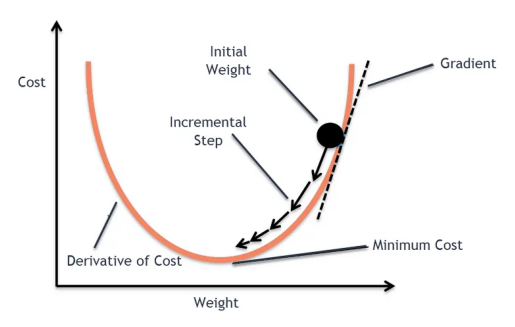

In [661]:
from PIL import Image
import matplotlib.pyplot as plt

# Charger l'image
img = Image.open(IMG_PATH)

# Afficher
plt.imshow(img)
plt.axis("off")
plt.show()

**Animation Gradient**

In [662]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Cost function: J(β) = (β - 1)²
def cost(beta):
    return (beta - 1)**2

# Gradient of J(β) with respect to β
def grad(beta):
    return 2 * (beta - 1)

# Range of β values to plot the cost curve
beta_vals = np.linspace(-1, 4, 200)
J = cost(beta_vals)

# Gradient descent parameters
beta_current = 3.5   # starting point
eta = 0.1            # learning rate
iterations = 20      # number of updates

# Store β values during training
betas = [beta_current]
for _ in range(iterations):
    beta_current = beta_current - eta * grad(beta_current)
    betas.append(beta_current)

# Prepare the figure
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(beta_vals, J, label="Cost function (MSE)")
ax.axvline(1, color="gray", linestyle="--", label="True minimum β=1")
ax.set_xlabel("β")
ax.set_ylabel("Cost (MSE)")
ax.set_title("Gradient Descent Animation")
ax.legend()

# Elements to update
point, = ax.plot([], [], 'ro', markersize=8)   # red dot for current β
trace, = ax.plot([], [], 'b--')                # dashed trace of updates

# Dynamic text box (bottom right)
text = ax.text(
    0.98, 0.02, "", transform=ax.transAxes,
    fontsize=12, verticalalignment="bottom", horizontalalignment="right",
    bbox=dict(facecolor="white", alpha=0.8, edgecolor="black")
)

# Update function for animation
def update(frame):
    b = betas[frame]
    point.set_data([b], [cost(b)])
    trace.set_data(betas[:frame+1], [cost(x) for x in betas[:frame+1]])
    text.set_text(f"Step {frame}\nβ = {b:.3f}\nCost (MSE) = {cost(b):.3f}")
    return point, trace, text

# Run the animation
ani = FuncAnimation(fig, update, frames=len(betas), interval=600, blit=False, repeat=False)

plt.close(fig)  # avoid duplicate static image
HTML(ani.to_jshtml())

In [663]:
# Weight initialization
# Since the MSE loss function is convex (only one global minimum),
# there is no risk of getting stuck in a local minimum.
# Therefore, a simple initialization can be used.

# Assume X_train is already defined
n_features = X_train_norm.shape[1]   # number of columns (features + bias)

# Random generator (seed for reproducibility)
rng = np.random.default_rng(42)

# Initialization: random values ~ N(0, 0.01) -> Normal law
beta_init = rng.normal(loc=0.0, scale=0.01, size=n_features)

print("Beta shape:", beta_init.shape)
print("Initialized beta vector:", beta_init)

Beta shape: (6,)
Initialized beta vector: [ 0.00304717 -0.01039984  0.00750451  0.00940565 -0.01951035 -0.0130218 ]


#### 4.3 Sanity Check: Shapes & Dimensions ####

In [664]:
assert X_train.shape[1] == X_test.shape[1], "Train/Test do not have the same number of columns"
assert X_train.shape[0] == y_train.shape[0], "X_train and y_train do not have the same number of samples"
assert X_test.shape[0]  == y_test.shape[0],  "X_test and y_test do not have the same number of samples"
assert beta_init.shape[0] == X_train.shape[1], "The weight vector and X_train do not have the same number of columns"
assert X.ndim == 2
assert y.ndim == 1  # if (n,1) -> y = y.ravel()
print("✅ All shape checks passed. Dimensions are consistent.")

# Ensure the data is in float type for linear algebra
X_train = X_train.astype(float)
X_test  = X_test.astype(float)
y_train = y_train.astype(float)
y_test  = y_test.astype(float)

✅ All shape checks passed. Dimensions are consistent.


#### 4.4 L2 Regularization (Ridge): λ ####

The goal of regularization is to reduce overfitting by penalizing large weights. It keeps the model simpler, more stable, and improves generalization to unseen data.

**Cost functions (MSE)**

- **MSE only (no Ridge):**  
`J(β) = (1/n) · Σ (yᵢ - xᵢᵀβ)²`  

- **MSE + Ridge (L2):**  
`J(β) = (1/n) · Σ (yᵢ - xᵢᵀβ)²  +  λ · Σ βⱼ²`
(with β₀, the intercept, excluded from regularization)


**Gradients (partial derivative)**

- **MSE only (no Ridge):**  
`grad = (2/n) · Xᵀ (Xβ - y)`

- **MSE + Ridge (L2):**  
`grad = (2/n) · Xᵀ (Xβ - y) + 2λβ`  
(with β₀ excluded from regularization)

**Ridge Intuition (Shrinkage Toward 0)**

With Ridge, the gradient of each weight **βⱼ** (except the intercept) is updated with an extra term:  

`grad[j] += 2λβⱼ`  

This pushes every weight back toward zero.  

**Example for a single weight from the β vector (beta):**  

`λ = 0.1, η = 0.05`
Current weight: `β = 2`  
Gradient from MSE part only: **grad = +0.6** => **reducing β decrease MSE** 

- Without Ridge: `β ← 2 − 0.05 · 0.6 = 1.97`  
  
- With Ridge (extra 2λβ = 0.4): 
    - `β ← β - η · grad` 
    - `β ← 2 − 0.05 · (0.6 + 0.4) = 1.95`  

Ridge makes **β shrink faster toward 0**, even if the MSE gradient alone would have moved it less.


In [665]:
def gradient_descent(
    X_train, y_train, X_test, y_test, beta_init,
    lr=0.05, epochs=500, tol=1e-6,
    l2=0.1, average_l2=True
):
    """
    Batch gradient descent for linear regression (MSE) with optional Ridge regularization.
    Tracks both train and test MSE at each epoch.
    
    Parameters
    ----------
    X_train : array (n, p)  -- column 0 = 1 for the intercept
    y_train : array (n,)
    X_test : array (m, p)
    y_test : array (m,)
    beta_init : array (p,)
    lr : float        -- learning rate
    epochs : int
    tol : float       -- early stopping if ΔMSE < tol (on train loss)
    l2 : float        -- Ridge coefficient (β0 not penalized)
    average_l2 : bool -- if True, penalty / n (consistent with averaged MSE)

    Returns
    -------
    beta : (p,)
    history_train : (t,) -- train MSE per iteration
    history_test : (t,)  -- test MSE per iteration
    stopped_at : int     -- number of updates performed (1..epochs)
    last_loss : float    -- final train MSE
    grad : (p,)          -- last gradient
    """
    import numpy as np
    
    n, _ = X_train.shape
    beta = np.asarray(beta_init, dtype=float).copy()

    history_train = []
    history_test = []
    stopped_at = epochs

    for t in range(epochs):
        # 1) prediction (train)
        y_pred_train = X_train @ beta

        # 2) train MSE
        loss_train = np.mean((y_train - y_pred_train) ** 2)
        history_train.append(loss_train)

        # 3) gradient (average)
        grad = (2.0 / n) * (X_train.T @ (y_pred_train - y_train))

        # 4) Ridge regularization (β0 not penalized)
        if l2 > 0.0:
            reg = beta.copy()
            reg[0] = 0.0
            scale = (1.0 / n) if average_l2 else 1.0
            grad += 2.0 * l2 * scale * reg

        # 5) update
        beta -= lr * grad

        # 6) test MSE
        y_pred_test = X_test @ beta
        loss_test = np.mean((y_test - y_pred_test) ** 2)
        history_test.append(loss_test)

        # 7) early stopping (train loss)
        if t > 0 and abs(history_train[-2] - history_train[-1]) < tol:
            stopped_at = t + 1
            break

    return beta, np.array(history_train), np.array(history_test), stopped_at, history_train[-1], grad


In [666]:
beta_final, hist_train, hist_test, stopped_at, last_loss, grad = gradient_descent(
    X_train_norm, y_train,
    X_test_norm, y_test,
    beta_init,
    lr=0.05, epochs=3000, tol=1e-10,
    l2=0.0, average_l2=True
)

print("Epochs performed (updates):", stopped_at)
print("\n")
print("Final MSE train:", last_loss)
print("\n")
print("Loss history train (last 10 values):", hist_train[:10])
print("\n")
print("Loss history test (last 10 values):", hist_test[:10])

Epochs performed (updates): 2873


Final MSE train: 8124.67020498302


Loss history train (last 10 values): [4000956.29829558 2913020.36402547 2127611.74551522 1560250.40467731
 1150102.55956548  853351.08927699  638426.91828557  482578.50479964
  369403.5741409   287072.89482262]


Loss history test (last 10 values): [4113532.23839485 3009112.48570886 2207030.72605473 1624569.03501336
 1201666.86716164  894702.58266883  671985.46632409  510486.71020072
  393468.08393901  308761.22108563]


We see that from epoch 2873 onward, the MSE no longer decreases beyond the minimum threshold of 1e-10 between epochs, so the algorithm stops to prevent overfitting. The mean squared error is 8124, which corresponds to about 90 euros error per prediction

### **5. Predicitons** ###

We compute the predictions by multiplying the weight vector learned during training (β) with the feature matrices X_train_norm and X_test_norm.

- y_pred_train are the predictions on the training set, i.e. on data the model has already seen. They tell us how well the model fits the known data.

- y_pred_test are the predictions on the test set, i.e. on unseen data. This shows the model’s ability to generalize to new inputs.

=> That’s the main purpose of the train/test split: check not only if the model learns the training examples, but also if it can make reliable predictions on data it never had access to.

In [667]:
beta_final

array([1829.32064952,  498.5647684 ,  202.32641613,  -45.33505958,
        -68.88526249,   34.9115409 ])

In [668]:
X_train_norm[0]

array([ 1.        , -1.59813621,  0.        , -0.86146098,  1.        ,
        0.        ])

**Prediction calculation for the first row**

Products detail :

| Feature (X)   | Coefficient (β)   | Product (X·β)  |
|---------------|-------------------|----------------|
| 1             | 1829.32064952     | 1829.32        |
| -1.5981       | 498.5647684       | ≈ -796.3       |
| 0             | 202.32641613      | 0              |
| -0.8615       | -45.33505958      | ≈ +39.0        |
| 1             | -68.88526249      | -68.89         |
| 0             | 34.9115409        | 0              |

Sum :

1829.32 − 796.3 + 0 + 39.0 − 68.9 + 0 ≈ **1003.1**

Final prediction for the first row: **ŷ₀ ≈ 1003.1** (corresponding to first value of y_pred_train vector)


In [669]:
# Train predictions
y_pred_train = X_train_norm @ beta_final
print(f"{y_pred_train}")

print("\n")
# Test Predictions
y_pred_test = X_test_norm @ beta_final

print(f"{y_pred_test}")

[1002.71536513 1777.64813886 1985.31229371 2093.69760409 1253.40159873
 2492.2092652  1828.11917859 2329.62030261 1345.69266821 2972.28714766
 1178.43327384 1883.06815447 2465.60075778 2111.73438765 1375.93377733
 2300.10460918 1593.12110064 2960.78141376 1536.09218721 1854.11101915
 2474.88652059 1043.47074076 2627.87038993 1504.08783233]


[2143.12207568 2102.21121919 2767.74076044 1418.33918923 2060.89728545
 3148.21563799]


In [670]:
print(y_test)
print("\n")
print(y_pred_test)

[2050. 1900. 2850. 1520. 2000. 3400.]


[2143.12207568 2102.21121919 2767.74076044 1418.33918923 2060.89728545
 3148.21563799]


### **6. Metrics & Plots** ###

#### 6.1 MSE (Mean Square Error) ####

As seen earlier, the MSE is the mean of the squared differences between y and the predictions. We compute it both on the training and the test set. It represents the average error per prediction. The error is squared to remove the sign (+/−) and measure only the magnitude.

In [671]:
# MSE
mse_train = np.mean((y_train - y_pred_train)**2)
mse_test  = np.mean((y_test  - y_pred_test)**2)

#### 6.2 R² Score ####

We can think of the R² score as a contest between our model and the mean: it shows how much better the model predicts compared to always using the average. The closer R² is to 1, the more accurate the model is. On the other hand, a value around or below 0.5 means the model is not doing better than the mean, or even worse.

`R² = 1 − (Σ(yᵢ − ŷᵢ)²) / (Σ(yᵢ − ȳ)²)`


**Intuition :**

- The smaller the numerator (predictions close to y), the smaller the ratio, and the closer R² gets to 1.

- If the numerator is about the same as the denominator → R² ≈ 0 (the model is no better than just predicting the mean).

- If the numerator is larger than the denominator → R² < 0 (the model is worse than the mean).

In [672]:
def r2(y, y_pred):
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - y.mean())**2)
    return 1.0 if ss_tot == 0 else 1 - ss_res/ss_tot

r2_train = r2(y_train, y_pred_train)
r2_test  = r2(y_test,  y_pred_test)

print("Scores :")
print(f"Train -> MSE={mse_train:.6f} | R²={r2_train:.6f}")
print(f"Test  -> MSE={mse_test:.6f}  | R²={r2_test:.6f}")

Scores :
Train -> MSE=8124.670205 | R²=0.975299
Test  -> MSE=22294.407569  | R²=0.945005


It’s crucial that the training and test scores are roughly similar. If the gap between them is too large, it means the model has overfit the training data (the data it has already seen) and loses its ability to generalize to unseen data (the test set).

Here the values are quite similar, so we can consider our model good at generalizin

#### 6.3 Loss Curves (Train vs Test) ####

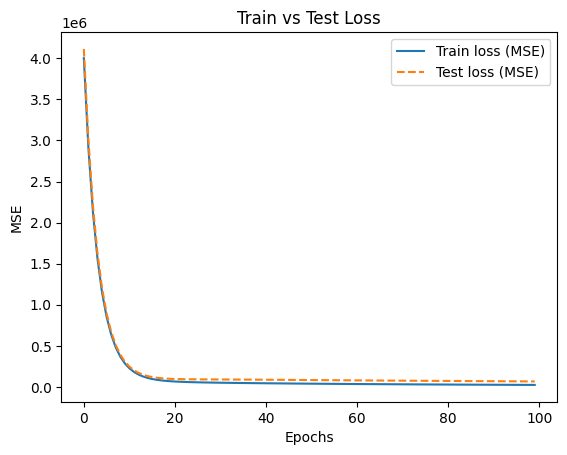

In [673]:
import matplotlib.pyplot as plt

plt.plot(hist_train[:100], label="Train loss (MSE)")
plt.plot(hist_test[:100], label="Test loss (MSE)", linestyle="--")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Train vs Test Loss")
plt.legend()
plt.show()

Here we only plotted the first 100 epochs so that the convergence of the model is easier to see on the graph. As the epochs increase, both the train and test losses decrease and almost overlap, which shows that the model is well fitted without clear signs of overfitting

## **7. Using the model on new data** ##

**New data :**

- surface = 30 m²

- furnished = 1

- distance_km = 0.3

- quartier = center

In [674]:
cols_to_scale = [1, 3]

In [675]:
# scale
X_train_std, X_test_std, (means, stds) = standardize_train_test(X_train, X_test, cols_to_scale)

print(means)
print(stds)

[44.29166667  0.53333333]
[15.19999772  0.38693956]


In [676]:
# 1. Normalize continuous columns in the raw input
x_new_raw = np.array([30.0, 1.0, 0.3, 1.0, 0.0])   # [area, furnished, distance, center, suburb]
x_new_scaled = x_new_raw.copy().astype(float)
x_new_scaled[[0, 2]] = (x_new_scaled[[0, 2]] - means) / stds   # normalize area and distance

# 2. Add the bias term in column 0
x_new = np.hstack([1.0, x_new_scaled])

# 3. Prediction
y_pred = x_new @ beta_final

print(x_new)
print("\n")
print(y_pred)

[ 1.         -0.94024137  1.         -0.60302269  1.          0.        ]


1521.3286521328566


For a 30 m² furnished apartment located in the city center, 0.3 km from the reference point, the predicted rent is about 1521 €.

### Thank you for reading !!!

Thanks for going through this notebook!  
I hope it helped you understand how gradient descent and regularization work when building a machine learning model from scratch with NumPy.  

There are of course many other aspects to explore. For example:  
- **L1 regularization (Lasso)** can shrink some coefficients exactly to zero, which is useful for feature selection.  
- **Grid Search** is a systematic way to test multiple hyperparameter values (learning rate, λ, etc.) and find the best configuration.  
- **k-fold cross validation** splits the data into *k* parts, trains *k* models on different folds, and averages the results. This reduces the risk of depending too much on a single train/test split and gives a more reliable estimate of model performance.  

Happy coding and keep exploring ML ! :)